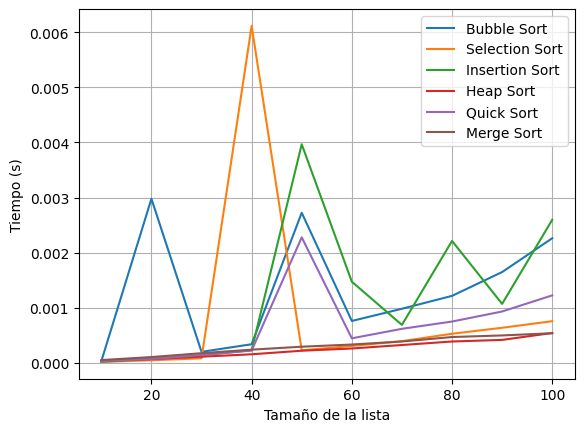

In [2]:
"""

En un solo código realizar el análisis de complejidad algorítmica de los algoritmos
de ordenamiento para el peor, mejor y caso promediado. Realizar un
análisis (en el mismo código como lo realizado en clase)

"""

import time
import matplotlib.pyplot as plt
import numpy as np

# Implementación de los algoritmos de ordenamiento

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr

def selection_sort(arr):
    for i in range(len(arr)):
        min_idx = i
        for j in range(i+1, len(arr)):
            if arr[min_idx] > arr[j]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]
    return arr

def insertion_sort(arr):
    for i in range(1, len(arr)):
        key = arr[i]
        j = i-1
        while j >= 0 and key < arr[j]:
            arr[j+1] = arr[j]
            j -= 1
        arr[j+1] = key
    return arr

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[largest] < arr[left]:
        largest = left

    if right < n and arr[largest] < arr[right]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)

    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)

    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)

    return arr

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i+1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi-1)
        quick_sort(arr, pi+1, high)

def merge(arr, left, mid, right):
    n1 = mid - left + 1
    n2 = right - mid

    L = [arr[left + i] for i in range(n1)]
    R = [arr[mid + 1 + i] for i in range(n2)]

    i = j = 0
    k = left

    while i < n1 and j < n2:
        if L[i] <= R[j]:
            arr[k] = L[i]
            i += 1
        else:
            arr[k] = R[j]
            j += 1
        k += 1

    while i < n1:
        arr[k] = L[i]
        i += 1
        k += 1

    while j < n2:
        arr[k] = R[j]
        j += 1
        k += 1

def merge_sort(arr, left, right):
    if left < right:
        mid = (left + right) // 2
        merge_sort(arr, left, mid)
        merge_sort(arr, mid + 1, right)
        merge(arr, left, mid, right)

# Función para medir el tiempo de ejecución de un algoritmo de ordenamiento

def medir_tiempo(algoritmo, lista):
    inicio = time.time()
    if algoritmo in (quick_sort, merge_sort):
        algoritmo(lista, 0, len(lista)-1)
    else:
        algoritmo(lista)
    fin = time.time()
    return fin - inicio

# Definir los arreglos y tamaños de listas para el análisis de complejidad

tamanios_listas = range(10, 101, 10)  # Tamaños de las listas de prueba
tiempos_bubble = []
tiempos_selection = []
tiempos_insertion = []
tiempos_heap = []
tiempos_quick = []
tiempos_merge = []

# Realizar el análisis de complejidad

for n in tamanios_listas:
    desc_list = list(range(n, 0, -1))  # Lista descendente para cada tamaño

    tiempo_bubble = medir_tiempo(bubble_sort, desc_list.copy())
    tiempos_bubble.append(tiempo_bubble)

    tiempo_selection = medir_tiempo(selection_sort, desc_list.copy())
    tiempos_selection.append(tiempo_selection)

    tiempo_insertion = medir_tiempo(insertion_sort, desc_list.copy())
    tiempos_insertion.append(tiempo_insertion)

    tiempo_heap = medir_tiempo(heap_sort, desc_list.copy())
    tiempos_heap.append(tiempo_heap)

    tiempo_quick = medir_tiempo(quick_sort, desc_list.copy())
    tiempos_quick.append(tiempo_quick)

    tiempo_merge = medir_tiempo(merge_sort, desc_list.copy())
    tiempos_merge.append(tiempo_merge)

# Graficar los resultados

plt.plot(tamanios_listas, tiempos_bubble, label='Bubble Sort')
plt.plot(tamanios_listas, tiempos_selection, label='Selection Sort')
plt.plot(tamanios_listas, tiempos_insertion, label='Insertion Sort')
plt.plot(tamanios_listas, tiempos_heap, label='Heap Sort')
plt.plot(tamanios_listas, tiempos_quick, label='Quick Sort')
plt.plot(tamanios_listas, tiempos_merge, label='Merge Sort')
plt.xlabel('Tamaño de la lista')
plt.ylabel('Tiempo (s)')
plt.legend()
plt.grid()
plt.show()
